<img   src="../figuras/logo/TalentQ_LogoPosNegro.png" align=center  width="120"/>
<br>

<table width="100%">
<td style="font-size:42px;font-style:italic;text-align:right;background-color:rgba(0, 160, 120,0.6)">
Probabilidades 
</td></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\mathbb H}} $


## Variable aleatoria

Decimos de una variable, $X$, que es aleatoria, cuando
<br>

- cada consulta de su valor arroja un resultado impredecible
<br>

- no hay ninguna relación entre los resultados de distintas consultas
<br>

$X$ puede ser real, compleja, entera, binaria,...  A veces denominamos a la consulta, *medida*, y a veces *tirada*.

<br>

 A pesar de que una variable aleatoria parece algo caótico o carente de información,  hay cierta estructura que se pone de manifiesto en la reiteración de la medida. Basta con anotar los resultados de las tiradas y el número de veces que aparecen

<br>



## Frecuencias e Histogramas


La tirada repetida de una variable aleatoria conduce a una tabla de datos con posibles repeticiones. 
Estos datos se pueden agrupar en intervals o *bins* que eliminen cierta precisión numérica. Por ejemplo haciendo que $13.1$ y $13$ pertenezcan al mismo *bin*.

Un histograma es un diagrama en el que, por cada *bin*, hay una columna, cuya altura representa el número de sucesos que pertenecen a dicho *bin*

En el siguiente ejemplo, puedes ver cómo, la misma lista de datos conduce a distintos histogramas si cambias la anchura de los bins mediante la variable *anchurabins*

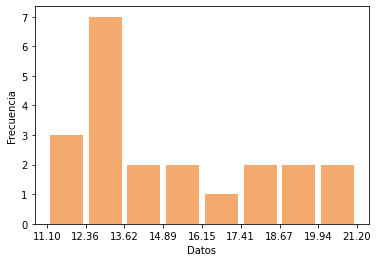

In [1]:
import numpy as np
import matplotlib.pyplot as plt

datos1 = [12.2, 15.3, 13, 12.8, 18.1, 13, 20, 19.5, 20.2, 12.1, 12.4, 13.2, 17.9, 14.1, 15, 13.4, 11.1, 14.6, 13, 17.4, 19.2]
datos2 = np.linspace(0.,10.,20)
datos  = datos1

anchura_bins = 1.
num_bins = int((max(datos)-min(datos))/anchura_bins) #número de bins
bins_list = np.linspace(min(datos), max(datos) + 1 ,num_bins) #calculamos los extremos de los intervalos

'generamos una instancia de histograma'
counts, bins, ignore = plt.hist(x=datos, bins = bins_list, color='#F2AB6D', rwidth=0.85)
plt.xlabel('Datos')
plt.ylabel('Frecuencia')
plt.xticks(bins_list)

'dibujamos el histograma. No es necesario invocar counts ni bins. Basta con plt.hist'
plt.show()

In [8]:
count

array([3., 7., 2., 2., 1., 2., 2., 2.])

Sea $X$ una variables que puede tomar valores  $X \in \{a_1,\ldots,a_p\}$. $N$ consultas se repartirán entre los posibles valores $a_i$ con números de aparición $n(a_i)$ tales que  $n(a_1) +  \ldots + n(a_p) = N$. 

Cuando $N$ crece, las fracciones relativas *se estabilizan* en valores reales positivos 

$$
p(a_i) = \frac{n(a_i)}{N}  ~\in~[0,1]
$$

que obviamente deben sumar a la unidad

$$
\sum_{i=1}^p p(a_i) \, =\,  \sum_{i=1}^p \frac{n(a_i)}{N} \, = \, \frac{n(a_1) + \ldots + n(a_p)}{N} \, =\,  \frac{N}{N} = 1
$$

Dichas fracciones relativas reflejan algo de la estructura interna del sistema físico que describe la variable $x$ y que no se borra totalmente en el promedio. El número $p(a_i)$ al que tienden es la **probabilidad** de aparición del valor $a_i$ en una sola tirada. 

## Distribución de probabilidad

Una distribución de probabilidad es una función real que asigna un número real $p(x)$ a cualquier *suceso* de la variable $x$ de la variable aleatoria $X$. Para que una función real sea una posible distribución de probabilidad tiene que verificar las dos condiciones siguientes
$$
p(X) \in [0,1]~~~~,~~~\sum_{x\in X }p(x) = 1 
$$
Es decir, la suma de todas las probabilidades debe estar normalizada a la unidad.

Para especificar completamente una variable aleatoria solemos escribir $(X,p(X))$ donde $p(X)$ es la distribuión de probabilidad. 



### Histogramas a partir de distribuciones de probabilidad

Vamos a estudiar la distribución normal centrada en $\mu$ y con anchura $\sigma$
$$
p(x) = \frac{1}{\sqrt{2\pi}\sigma} \exp \left({-\frac{(x-\mu)^2}{2\sigma^2}}\right)
$$

In [8]:
'generamos una instancia de la distribución normal'
mu, sigma = 0, 0.1 # mean and standard deviation
N = 10000
s = np.random.normal(mu, sigma, N)

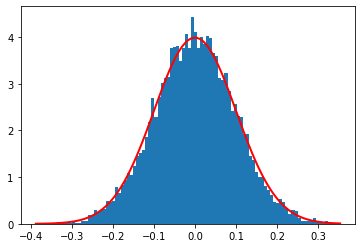

In [9]:
import matplotlib.pyplot as plt


'generamos una instancia de histograma con un número de bins. Extraemos los bins exactos para'
'poder generar luego la gráfica analítica'
num_bins=100
counts, bins, ignore = plt.hist(s, num_bins, density=True)

'dibujamos la función analítica para comparar'
def gaussian(x,mu,sigma):
    return 1/(sigma * np.sqrt(2 * np.pi))*np.exp( - (x - mu)**2 / (2 * sigma**2) )
    
plt.plot(bins, gaussian(bins,mu,sigma),linewidth=2, color='r')

plt.show()

En el límite de número de eventos $N\to \infty$, el histograma y la curva matemática confluyen.

## Estimadores estadísticos

## Probabilidades combinadas

Las probabilidades combinadas son la base de las correlaciones. Es aquí donde la Mecánica Cuántica produce resultados inesperados. 

Podemos hablar de experimentos simultáneos asociados a dos variables aleatorias $(X,Y,p(X,Y))$. La función de **probabilidad combinada** $p(X,Y)$ asocia un número $p(x,y)\in[0,1]$ a una pareja de resultados $x$ e $y$ obtenidos independientemente el uno del otro. 

Hay que tratar las parejas de eventos  como un solo evento combinado $a = (x,y)$. Por eso, la condición de normalización ahora es 

$$
\sum_a p(a) = \sum_{xy} p(x,y) = 1\, .
$$


La suma parcial sobre una de las dos variables conduce a sendas **distribuciones marginales**

$$
\tilde p(x) = \sum_{y} p(x,y) ~~~~~~~~~ \tilde p(y) = \sum_{x} p(x,y)
$$

## Entropía de una variable aleatoria

<div class="alert alert-block alert-info",text-align:center>
 <p style="text-align: left ;color: navy;">  
     <b>Definición:</b>
     dada una variable aleatoria $(X,p(X))$ definimos la <i>entropía</i> asociada mediante la expresión
     <br>
     <br>
     $$
     H = -\sum_x p(x)\log p(x)
     $$
    </p>
    </div>

- El signo negativo hace esta expresión positiva, debido a que $\log p(x)\leq 0$.

- El valor de $H$ está acotado entre $H\in [0, 1/N]$ donde $N$ es el número de sucesos $x$ posibles 